<a href="https://colab.research.google.com/github/KavyaThakar/Machine-Learning/blob/main/Experiment1_Data_Analysis_and_ML_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving survey_results_public.csv to survey_results_public.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
file_path = "survey_results_public.csv"
df = pd.read_csv(file_path)

/tmp/ipython-input-23-834692021.py:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumns in Dataset:\n", df.columns.tolist()[:20], "...")  # show first 20 columns
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (98855, 129)

Columns in Dataset:
 ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3'] ...

First 5 Rows:
    Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2

In [ ]:

# Drop columns with more than 70% missing values
df = df.dropna(axis=1, thresh=len(df)*0.3)
df['Country'].fillna('Unknown', inplace=True)
df['ConvertedSalary'].fillna(0, inplace=True)

/tmp/ipython-input-25-2736879324.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-25-2736879324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-25-2736879324.py:5: FutureWarning: A value is trying to be set o


Top 10 Countries by Respondents:
 Country
United States         20309
India                 13721
Germany                6459
United Kingdom         6221
Canada                 3393
Russian Federation     2869
France                 2572
Brazil                 2505
Poland                 2122
Australia              2018
Name: count, dtype: int64


/tmp/ipython-input-26-2651829350.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


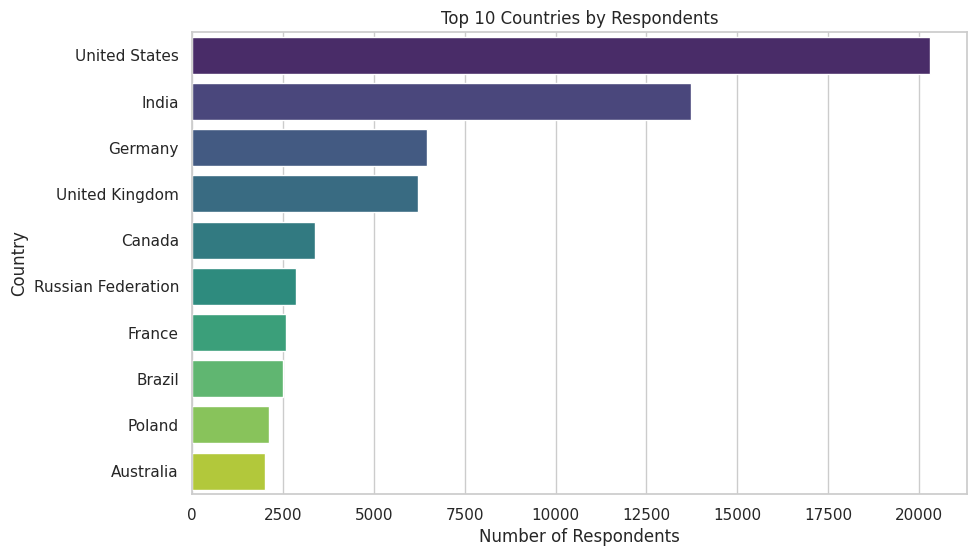

In [ ]:
# Analysis 1: Top 10 Countries by Respondents
top_countries = df['Country'].value_counts().head(10)
print("\nTop 10 Countries by Respondents:\n", top_countries)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Respondents")
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plt.show()


Top 10 Programming Languages:
 JavaScript    54686
HTML          53628
CSS           50979
SQL           44670
Java          35521
Bash/Shell    31172
Python        30359
C#            26954
PHP           24071
C++           19872
Name: count, dtype: int64


/tmp/ipython-input-27-1274128301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.values, y=lang_counts.index, palette="coolwarm")


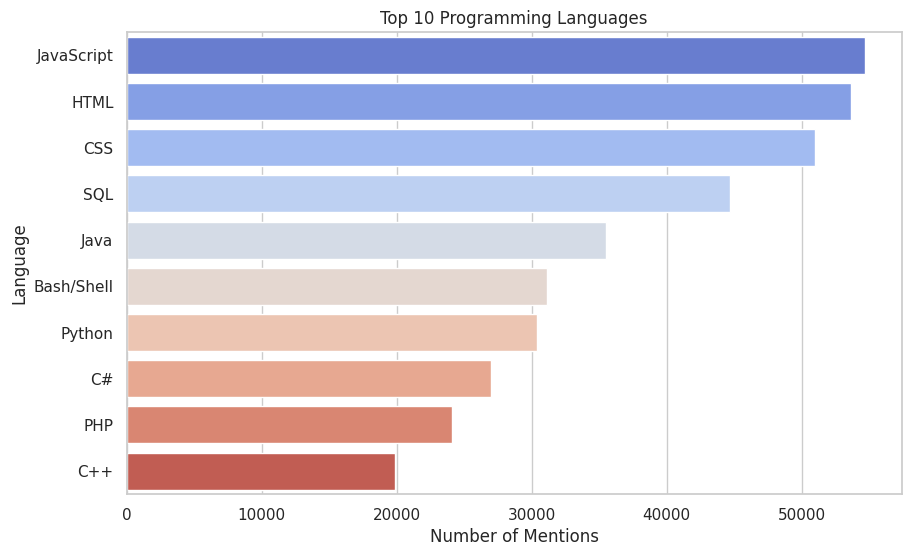

In [ ]:
# Analysis 2: Most Popular Programming Languages
lang_series = df['LanguageWorkedWith'].dropna().str.split(';')
all_languages = [lang for sublist in lang_series for lang in sublist]
lang_counts = pd.Series(all_languages).value_counts().head(10)

print("\nTop 10 Programming Languages:\n", lang_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=lang_counts.values, y=lang_counts.index, palette="coolwarm")
plt.title("Top 10 Programming Languages")
plt.xlabel("Number of Mentions")
plt.ylabel("Language")
plt.show()


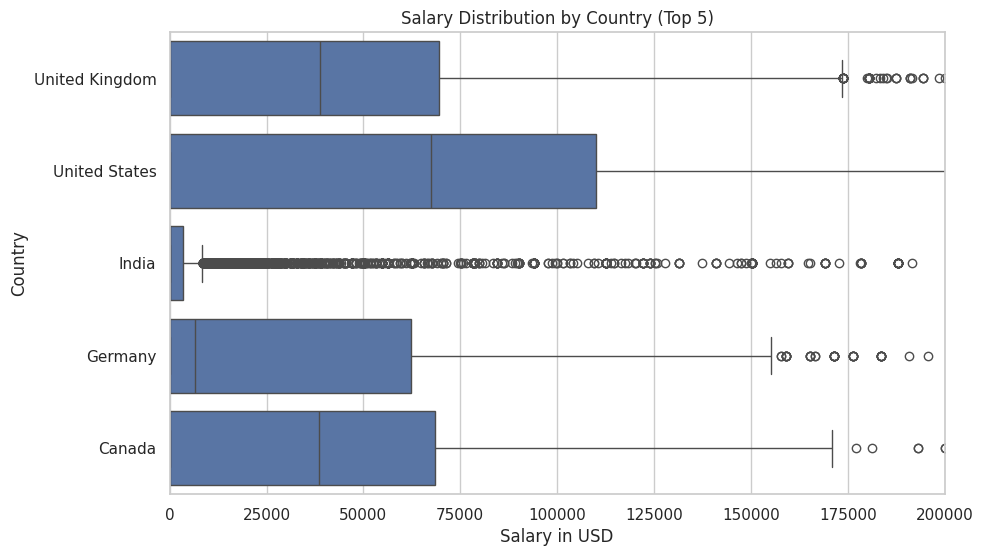

In [ ]:
# Analysis 3: Salary Distribution by Country (Top 5)
top_5_countries = top_countries.index[:5]
salary_data = df[df['Country'].isin(top_5_countries)]

plt.figure(figsize=(10,6))
sns.boxplot(x='ConvertedSalary', y='Country', data=salary_data)
plt.xlim(0, 200000)  # limit outliers
plt.title("Salary Distribution by Country (Top 5)")
plt.xlabel("Salary in USD")
plt.ylabel("Country")
plt.show()


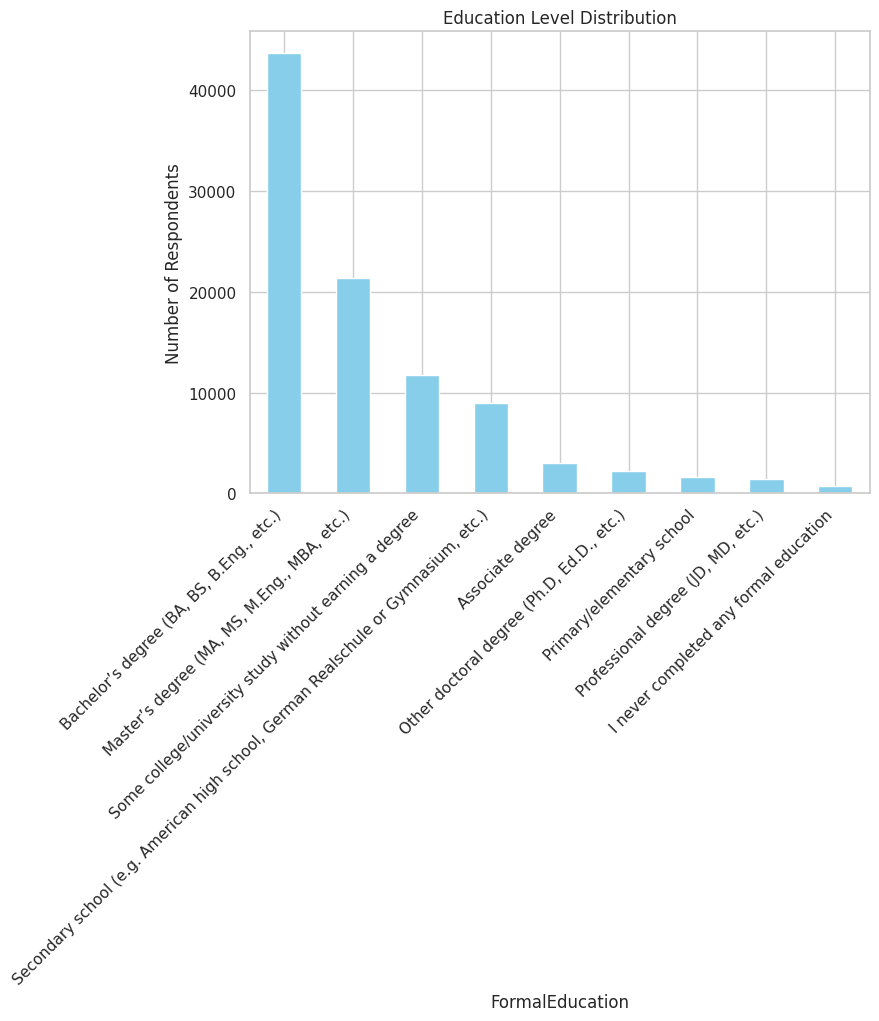

In [ ]:
# Analysis 4: Education Level Distribution
edu_counts = df['FormalEducation'].value_counts()

plt.figure(figsize=(8,6))
edu_counts.plot(kind='bar', color='skyblue')
plt.title("Education Level Distribution")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.show()

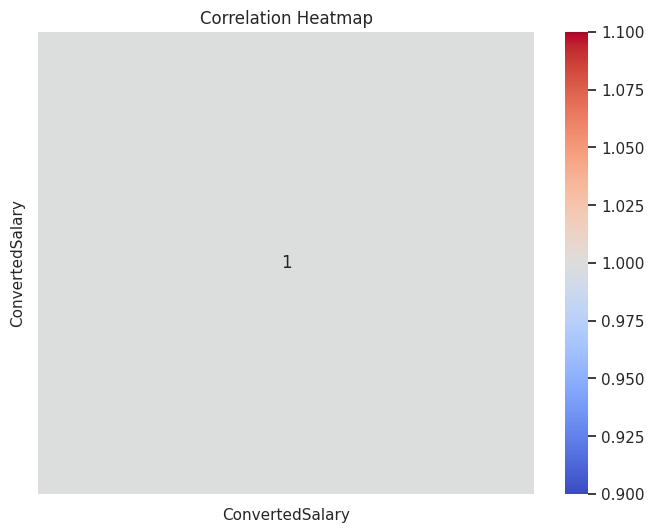

In [ ]:
# Analysis 5: Correlation Heatmap for Numeric Columns
plt.figure(figsize=(8,6))
sns.heatmap(df[['ConvertedSalary']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()